# Jakarta Air Quality Index Classification

**Data Description** :
We've made this project with 2 datasets from open-meteo website (open-meteo.com), air quality data and weather historical data in DKI Jakarta (Coordinate : -6.1818,106.8223).

**Air Quality Data** :
1. Time : the hour and date of collected data
2. pm10 : particulate matter small than 10 µm (μg/m³)
3. pm2_5 : articulate matter small than 2.5 µm (μg/m³)
4. carbon_monoxide : carbon monoxide quantity on 10 meter above ground (μg/m³)
5. nitrogen_oxide : nitrogen oxide quantity on 10 meter above ground (μg/m³)
6. sulphur_dioxide : sulphur oxide quantity on 10 meter above ground (μg/m³)
7. ozone : ozone quantity on 10 meter above ground (μg/m³)
8. uv_index : the uv index, considering the clearness of sky and clouds
9. us_aqi : AQI
	- 0-50 (good) (1)
	- 51-100 (moderate) (2)
	- 101-150 (unhealthy for sensitive groups) (3)
	- 151-200 (unhealthy) (4)
	- 201-300 (very unhealthy) (5)

**Weather Historical Data** :
1. time : the hour and date of collected data
2. temperature_2m : air temperature at 2 meters above ground
3. relativehumidity : relative humidity at 2 meters above ground
4. windspeed_10m :  wind speed at 10 meters above ground
5. winddirection_10m : wind direction at 10 meters above ground
6. is_day : the day condition in the observed location (day = 1 , night = 0)



## Exploratory Data Analysis

In [ ]:
#binning the data into categorical
def range_to_cat(x):
    if x>200:
        return 5 # very unhealty
    elif x > 150:
        return 4 # unhealthy
    elif x >100:
        return 3 #unhealthy for sensitive groups
    elif x>50:
        return 2 # moderate
    return 1 # good

In [ ]:
#importing libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')

df_weather = pd.read_csv('weather_data.csv',parse_dates = ['time'],index_col = 'time')
df_aqi = pd.read_csv('AQI_data.csv',parse_dates = ['time'],index_col = 'time')
combined_data = pd.concat([df_weather,df_aqi],axis = 1)
combined_data['us_aqi'] = combined_data['us_aqi'].apply(lambda x : range_to_cat(x))
combined_data.head()

,temperature_2m,relativehumidity,windspeed_10m,winddirection_10m,is_day,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index,us_aqi
time,,,,,,,,,,,,,
2022-08-06 00:00:00,23.6,94,3.8,253,0,86.4,59.6,2370,132.0,39.2,30,0.0,3
2022-08-06 01:00:00,23.3,95,4.0,265,0,95.7,66.1,2526,135.6,40.9,30,0.0,3
2022-08-06 02:00:00,23.6,93,3.6,264,0,99.9,69.2,2523,131.6,43.1,31,0.0,3
2022-08-06 03:00:00,23.0,95,3.2,270,0,98.0,68.2,2453,123.7,45.6,31,0.0,3
2022-08-06 04:00:00,22.7,96,4.0,270,0,96.9,67.1,2389,113.7,48.5,34,0.0,3


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10344 entries, 2022-08-06 00:00:00 to 2023-10-10 23:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature_2m     10344 non-null  float64
 1   relativehumidity   10344 non-null  int64  
 2   windspeed_10m      10344 non-null  float64
 3   winddirection_10m  10344 non-null  int64  
 4   is_day             10344 non-null  int64  
 5   pm10               10344 non-null  float64
 6   pm2_5              10344 non-null  float64
 7   carbon_monoxide    10344 non-null  int64  
 8   nitrogen_dioxide   10344 non-null  float64
 9   sulphur_dioxide    10344 non-null  float64
 10  ozone              10344 non-null  int64  
 11  uv_index           10344 non-null  float64
 12  us_aqi             10344 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 1.1 MB


In [ ]:
combined_data.describe()

,temperature_2m,relativehumidity,windspeed_10m,winddirection_10m,is_day,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index,us_aqi
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,26.604727,80.390951,6.422129,186.223995,0.503384,70.926904,48.150648,2007.468097,72.583217,31.029660,86.222544,1.741638,3.015758
std,2.256918,11.656244,3.719789,96.031317,0.500013,39.668958,27.504340,1387.205596,48.100388,15.574052,85.058163,2.726383,0.812169
min,21.700000,38.000000,0.000000,1.000000,0.000000,0.500000,0.400000,58.000000,0.000000,0.200000,0.000000,0.000000,1.000000
25%,24.700000,73.000000,3.700000,107.000000,0.000000,40.700000,27.200000,977.000000,37.500000,18.800000,29.000000,0.000000,2.000000
50%,26.200000,83.000000,5.400000,202.000000,1.000000,65.000000,43.700000,1654.500000,60.700000,29.100000,51.000000,0.000000,3.000000
75%,28.300000,90.000000,8.400000,260.000000,1.000000,92.200000,62.900000,2672.000000,95.900000,40.800000,120.000000,2.850000,4.000000
max,34.000000,100.000000,22.100000,360.000000,1.000000,269.200000,186.700000,10796.000000,312.500000,135.600000,528.000000,12.950000,5.000000


In [ ]:
#null values proportion
(combined_data.isna().sum() * 100) / len(combined_data)

temperature_2m       0.0
relativehumidity     0.0
windspeed_10m        0.0
winddirection_10m    0.0
is_day               0.0
pm10                 0.0
pm2_5                0.0
carbon_monoxide      0.0
nitrogen_dioxide     0.0
sulphur_dioxide      0.0
ozone                0.0
uv_index             0.0
us_aqi               0.0
dtype: float64

In [ ]:
#duplicated data counts
combined_data.duplicated().sum()

0

### Univariate Analysis

#### AQI Rank Distribution

Text(0.5, 1.0, 'AQI Level Distribution')

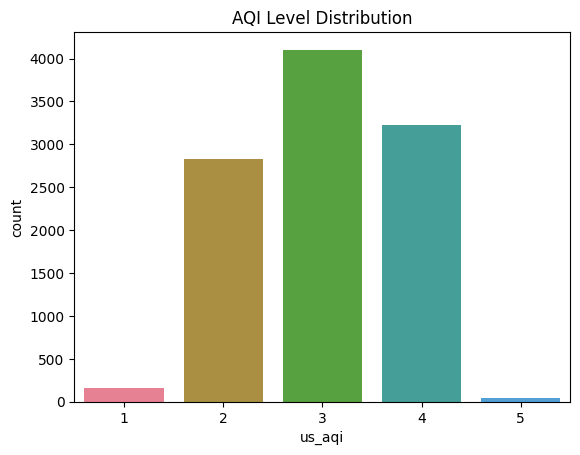

In [ ]:
sns.countplot(data = combined_data, x = 'us_aqi').set_title('AQI Level Distribution')

Based on bar chart above, there're no hazardous pollution level in the dataset.

Most pollution categories in the data are at third cateogory, where the pollution situation in Jakarta is unhealthy to sensitive groups (elderly people). Apart from that, the categories proportion is not balanced. An unbalanced categories proportion causes the classification predictions turns to biased, therefore oversampling is necessary to balance the proportion of this data.

#### Station Distribution

<Axes: xlabel='is_day', ylabel='count'>

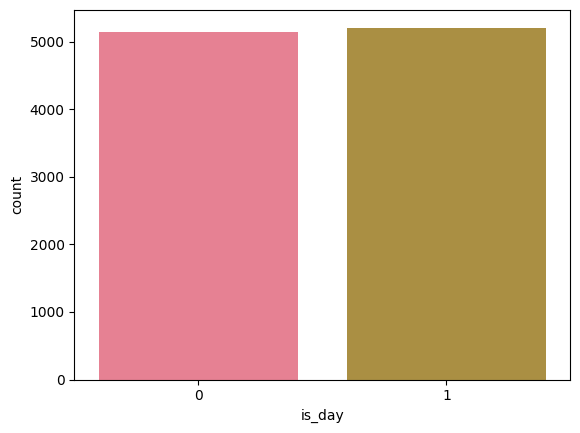

In [ ]:
sns.countplot(data = combined_data, x = 'is_day')

Based on this bar chart, the proportion of day categories are balanced.

#### Numerical Value Distribution

array([[<Axes: title={'center': 'temperature_2m'}>,
        <Axes: title={'center': 'relativehumidity'}>,
        <Axes: title={'center': 'windspeed_10m'}>,
        <Axes: title={'center': 'winddirection_10m'}>],
       [<Axes: title={'center': 'is_day'}>,
        <Axes: title={'center': 'pm10'}>,
        <Axes: title={'center': 'pm2_5'}>,
        <Axes: title={'center': 'carbon_monoxide'}>],
       [<Axes: title={'center': 'nitrogen_dioxide'}>,
        <Axes: title={'center': 'sulphur_dioxide'}>,
        <Axes: title={'center': 'ozone'}>,
        <Axes: title={'center': 'uv_index'}>],
       [<Axes: title={'center': 'us_aqi'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

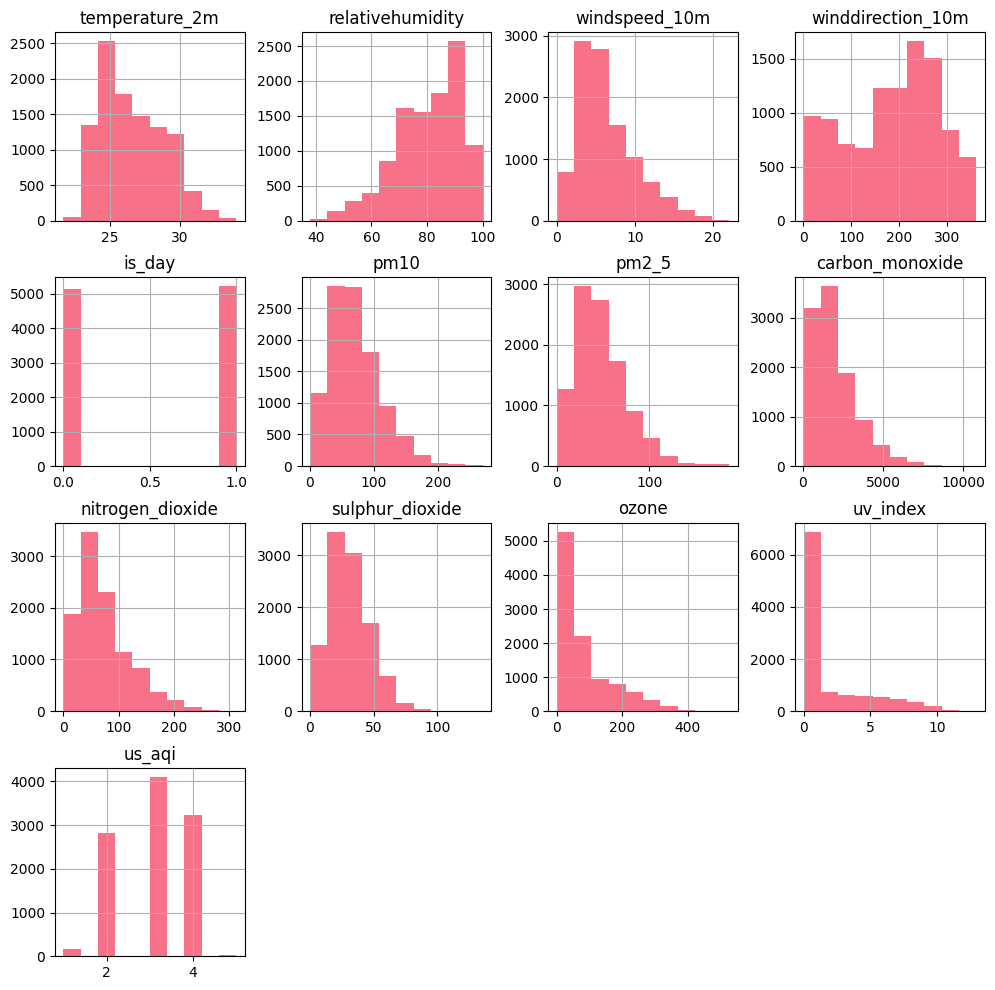

In [ ]:
combined_data.hist(figsize = (12,12))

#### Outlier Detection

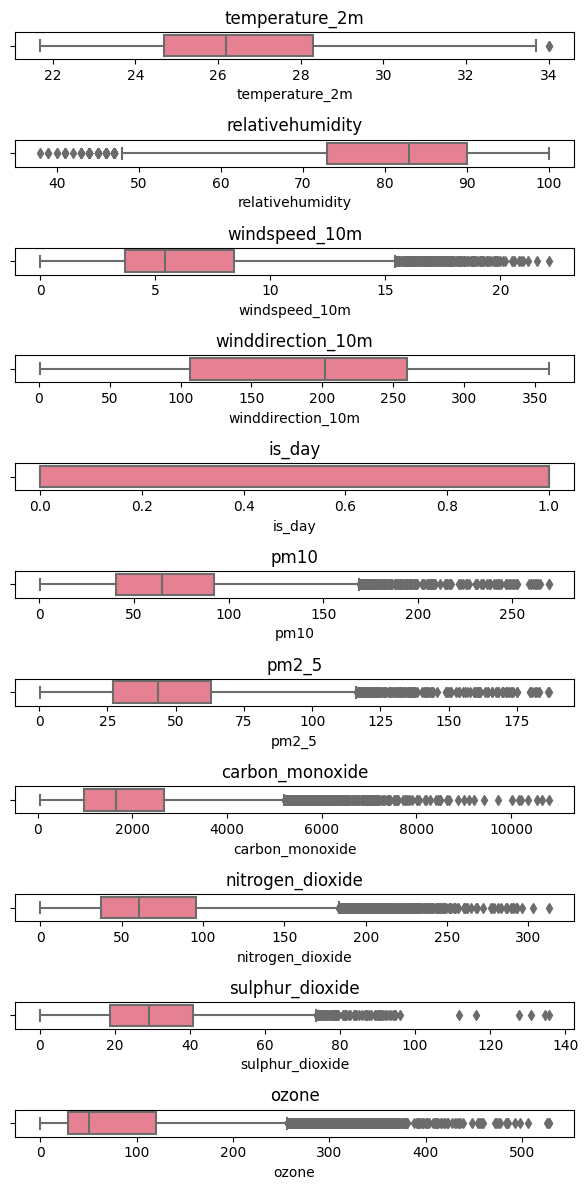

In [ ]:
fig,axes = plt.subplots(11,1,figsize = (6,12))

select_num = combined_data.columns.tolist()

for i in range(11):
    sns.boxplot(x = combined_data[select_num[i]], ax = axes[i]).set_title(f'{select_num[i]}')

fig.tight_layout()

In [ ]:
def proportion_outlier(df,col):
    q1 = df[col].quantile(q = 0.25)
    q3 = df[col].quantile(q = 0.75)
    iqr = q3 - q1

    lower,upper = q1 - (iqr * 1.5) , q3 + (iqr * 1.5)

    outlier_col = df[ (df[col] < lower) | (df[col] > upper) ]

    return len(outlier_col)/len(df)


for col in combined_data.columns:
    outlier_count = proportion_outlier(combined_data,col)
    print(f'{col} : {round(outlier_count,2)}%')

temperature_2m : 0.0%
relativehumidity : 0.01%
windspeed_10m : 0.03%
winddirection_10m : 0.0%
is_day : 0.0%
pm10 : 0.02%
pm2_5 : 0.02%
carbon_monoxide : 0.03%
nitrogen_dioxide : 0.04%
sulphur_dioxide : 0.01%
ozone : 0.06%
uv_index : 0.08%
us_aqi : 0.0%


Based on the boxplot and outlier proportion computation above, there are many outliers in each column.

## Time Series Data

In [ ]:
def trend_analysis(data):
    fig,axes = plt.subplots(4,3,figsize = (25,12))
    cols = data.columns.to_list()

    for i in range(min(len(cols), 12)):
        x = data.index.astype('int64')
        y = data[cols[i]]

        m,b = np.polyfit(x,y,1)

        sns.lineplot(x= data.index,y = data[cols[i]],label = cols[i], ax = axes[i // 3, i % 3]).set_title(cols[i])
        axes[i // 3, i % 3].plot(data.index,x*m + b,color = 'blue')
        axes[i // 3, i % 3].legend()

    fig.tight_layout()

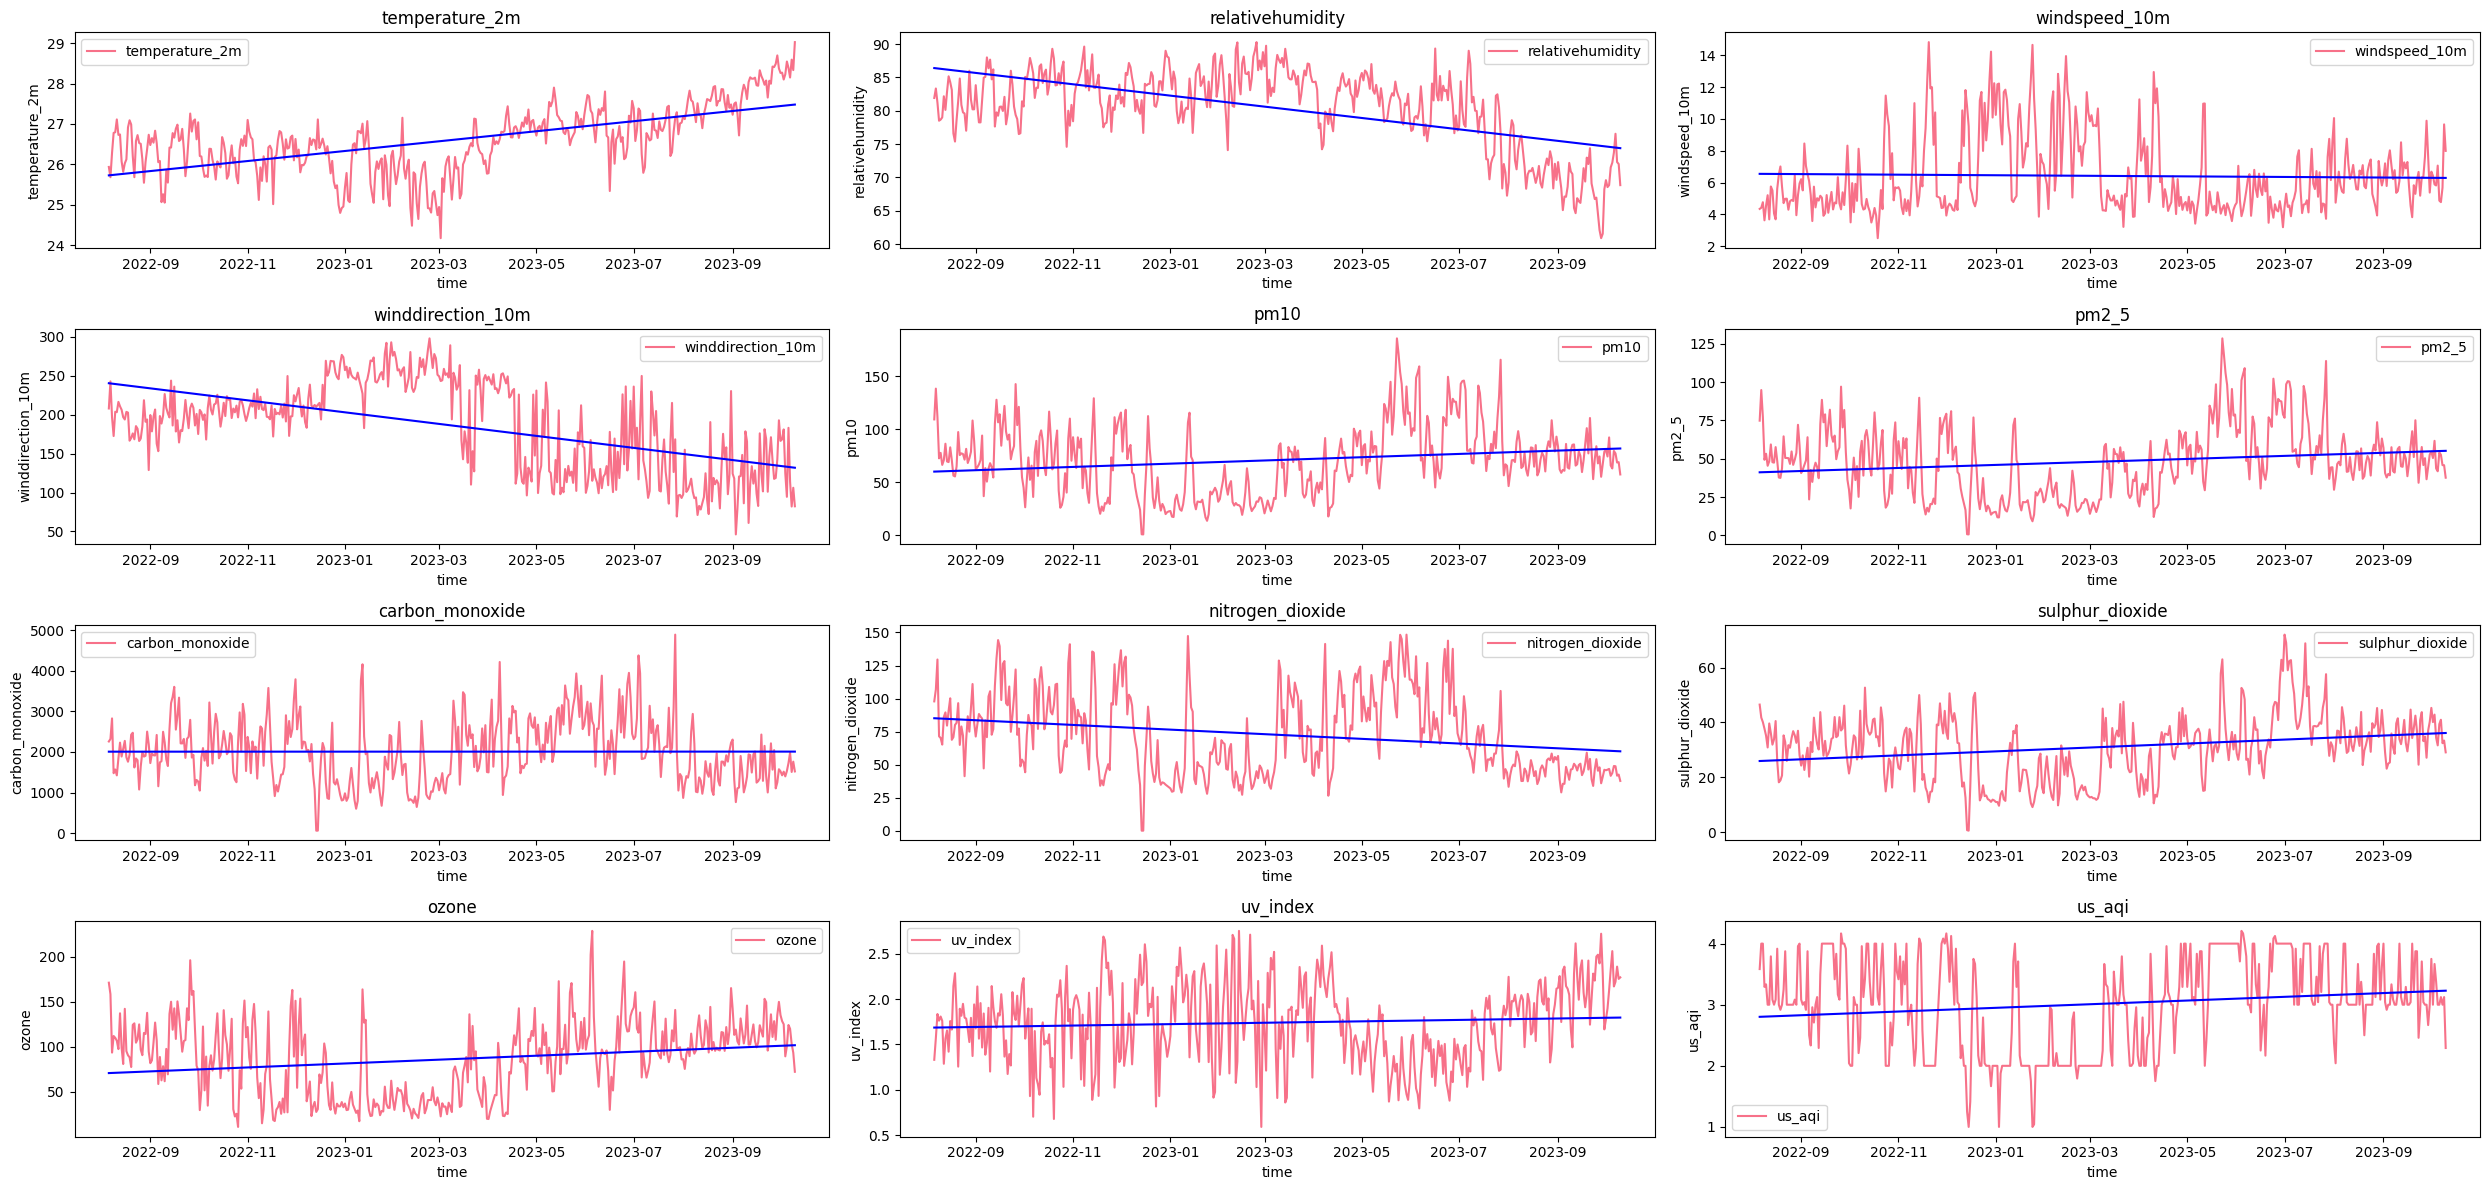

In [ ]:
trend_analysis(combined_data.drop(columns = 'is_day').resample('D').mean())

Based on the above time series, the temperature tends to increase each year. Meanwhile, the wind direction and humidity trend tend to decrease each year.

# Day Or Night Distributions


<Axes: xlabel='is_day', ylabel='count'>

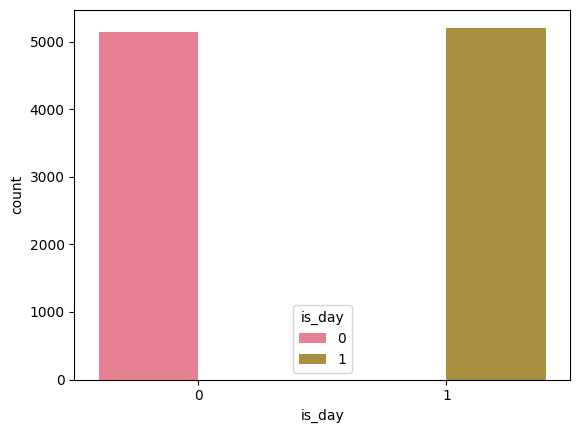

In [ ]:
sns.countplot(data = combined_data, x = 'is_day', hue = 'is_day')

Based on the bar chart above, there are no difference between the distribution of day (1) and night (0).

### Bivariate Analysis

In [ ]:
combined_data.groupby('us_aqi').agg(['mean','std']).T

us_aqi                           1            2            3            4  \
temperature_2m    mean   26.053548    25.986553    26.786233    26.901212   
                  std     1.769484     1.903276     2.405101     2.245582   
relativehumidity  mean   82.129032    83.177990    78.990497    79.815781   
                  std     7.470904     8.824132    12.998590    11.744162   
windspeed_10m     mean   11.428387     8.738818     5.688377     5.081827   
                  std     3.879981     4.002450     3.355311     2.623168   
winddirection_10m mean  235.696774   232.459660   166.688353   168.238273   
                  std    32.877256    63.603328   100.458001   100.691142   
is_day            mean    0.554839     0.528309     0.487329     0.493321   
                  std     0.498595     0.499286     0.499900     0.500033   
pm10              mean   14.023226    36.229653    70.617788   103.941193   
                  std    12.649146    16.883509    24.979744    40.841904   
pm2_5             mean    9.415484    24.448337    47.690010    71.013203   
                  std     8.390766    11.589771    17.470704    28.577398   
carbon_monoxide   mean  616.690323  1503.764331  1974.552388  2559.290463   
                  std   629.321368  1122.573717  1242.426691  1571.221202   
nitrogen_dioxide  mean   22.203226    49.600991    72.517154    95.668189   
                  std    18.687072    26.230935    43.102327    57.552228   
sulphur_dioxide   mean    7.561935    20.001415    33.137476    38.969369   
                  std     5.646241    11.622122    13.144600    15.280355   
ozone             mean   34.509677    39.309271    89.777778   120.851196   
                  std    30.616261    40.239987    75.800132    97.608074   
uv_index          mean    2.130645     1.880202     1.755811     1.560966   
                  std     2.455126     2.953752     2.792777     2.420233   

us_aqi                            5  
temperature_2m    mean    29.932500  
                  std      0.699959  
relativehumidity  mean    66.725000  
                  std      3.967738  
windspeed_10m     mean     6.492500  
                  std      2.032226  
winddirection_10m mean   179.725000  
                  std    136.410577  
is_day            mean     1.000000  
                  std      0.000000  
pm10              mean   117.680000  
                  std     21.238707  
pm2_5             mean    80.215000  
                  std     15.120585  
carbon_monoxide   mean  1952.650000  
                  std    276.869269  
nitrogen_dioxide  mean    40.515000  
                  std     14.666822  
sulphur_dioxide   mean    45.902500  
                  std      8.554785  
ozone             mean   449.525000  
                  std     36.770241  
uv_index          mean     3.530000  
                  std      1.914714

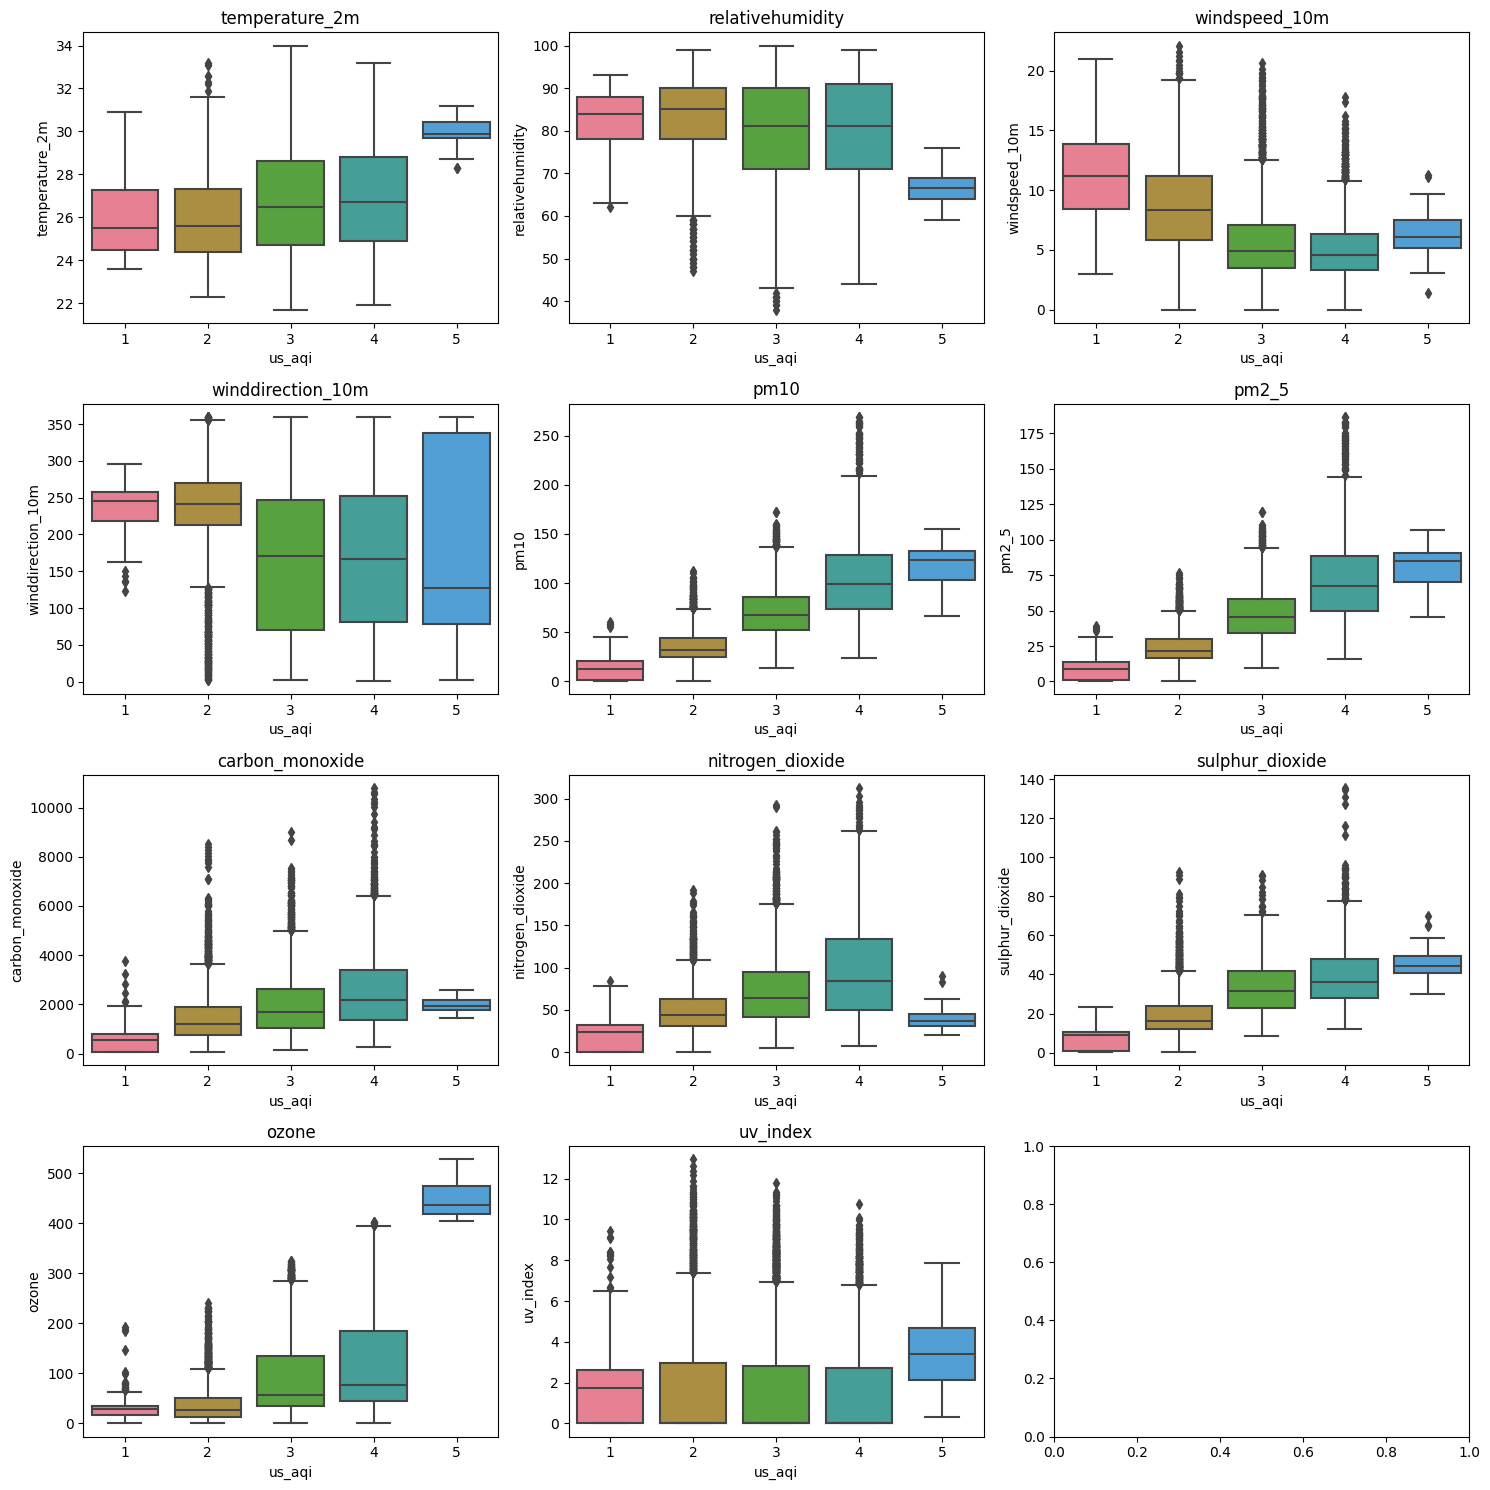

In [ ]:
def show_boxplot(df):
    fig,axes = plt.subplots(4,3,figsize = (15,15))

    cols = df.drop(columns = ['us_aqi']).columns.to_list()

    for i in range(min(len(cols), 12)):
        x = df.index.astype('int64')
        y = df[cols[i]]

        m,b = np.polyfit(x,y,1)

        sns.boxplot(data = df, x= 'us_aqi',y = cols[i], ax = axes[i // 3, i % 3]).set_title(cols[i])

    fig.tight_layout()

show_boxplot(combined_data.drop(columns = ['is_day']))

Based on the table and boxplot graph above, there are any recognized distribution and means difference of every AQI level on ozone, sulphur dioxide, nitrogen oxide, carbon monoxide, pm 10 , pm 2.5 ,windspeed, relative humidity, and temperature attributes

### Multivariate Analysis

#### Correlation

<Axes: >

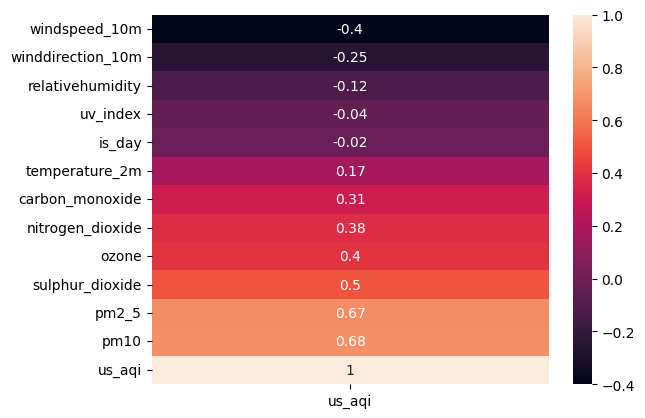

In [ ]:
corr = combined_data.corr(method = 'pearson')
sns.heatmap(corr[['us_aqi']].sort_values(by = 'us_aqi').round(2),annot = True)

Based on Pearson correlation analysis, the variables which have moderate and strong correlations to the AQI level are pm10,pm2_5, sulphur dioxide and windspeed_10m.

<Axes: >

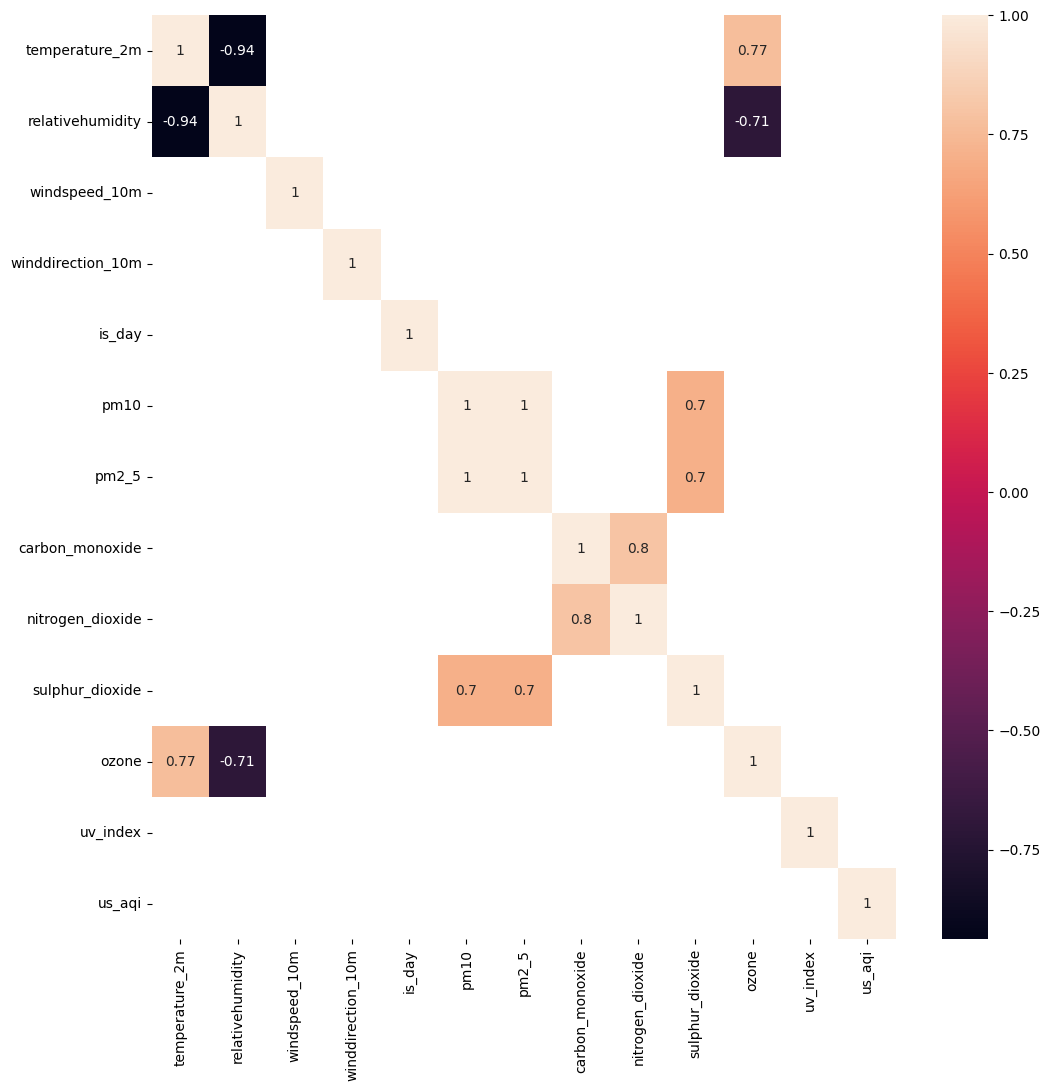

In [ ]:
fig,ax = plt.subplots(1,figsize = (12,12))
sns.heatmap(corr[(corr < -0.7) | (corr > 0.7)],annot = True,ax = ax)

Based on corelation heatmap above , there is a multicolinearity between relativehumidity and temperature_2m.

## Feature Engineering

In [ ]:
polutant_list = ["carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"]

def cleaning_outlier(df):

    columns_list = df.columns
    df_result = df.copy()

    for col in columns_list :
        q1 = df[col].quantile(q = 0.25)
        q3 = df[col].quantile(q = 0.75)
        iqr = q3 - q1

        lower,upper = q1 - (iqr * 1.5) , q3 + (iqr * 1.5)

        avg_column = df[col].median()

        df_result.loc[ (df[col] < lower), col] = q1
        df_result.loc[ (df[col] > upper), col] = q3

    return df_result


def normal_transform(df,columns = polutant_list):
    normal_result = df.copy()
    for col in columns :
        normal_result[col] = normal_result[col]**(1/2)

    return normal_result

def preprocess_data(df):

    df_result = df.copy()
    df_result = df.drop(columns = ['relativehumidity','uv_index'])

    #normal transformation the polution data
    df_result = normal_transform(df_result)

    #clean the outlier
    df_result = cleaning_outlier(df_result)

    #feature interaction
    df_result['pm_ratio'] = (1 + df_result['pm10']) / (1 + df_result['pm2_5'])
    df_result['ozone_temperature'] = df_result['ozone'] * df['temperature_2m']

    #wind magnitude
    u = df_result['windspeed_10m'] * np.cos(df_result['winddirection_10m'])
    v = df_result['windspeed_10m'] * np.sin(df_result['winddirection_10m'])
    df_result['wind_magnitude'] = np.sqrt(u**2 + v**2)


    return df_result

cleaned_data = preprocess_data(combined_data)



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = cleaned_data.drop(columns = 'us_aqi').values
y = cleaned_data['us_aqi']

X, y = sm.fit_resample(X, y)


Text(0.5, 1.0, 'Oversampled AQI Level')

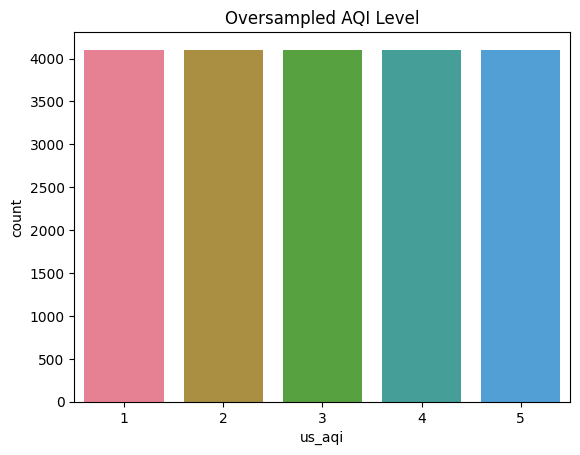

In [ ]:
sns.countplot(x = y).set_title('Oversampled AQI Level')

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16416, 13), (4104, 13), (16416,), (4104,))

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

Scaler = MinMaxScaler()
scaled_x_train = Scaler.fit_transform(X_train)
scaled_x_test = Scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict = knn.predict(scaled_x_test)

print('\nClassification Report KNN \n')
print(classification_report(y_test, y_predict))


Classification Report KNN 

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       821
           2       0.89      0.89      0.89       820
           3       0.74      0.71      0.72       821
           4       0.79      0.79      0.79       821
           5       1.00      1.00      1.00       821

    accuracy                           0.88      4104
   macro avg       0.88      0.88      0.88      4104
weighted avg       0.88      0.88      0.88      4104



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': range(1,51,2),
    'weights':['uniform','distance'],
    'p' :[1,2]
}


knn = KNeighborsClassifier()
knn = GridSearchCV(knn ,param_grid = parameters, scoring='accuracy', cv=5)
knn.fit(scaled_x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best Params : ",knn.best_params_)
print("Accuracy :", knn.best_score_)

Best Params :  {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.8712226050636227


In [ ]:
y_predict_2 = knn.predict(scaled_x_test)

print('\nClassification Report KNN Tuned\n')
print(classification_report(y_test, y_predict_2))


Classification Report KNN Tuned

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       821
           2       0.89      0.89      0.89       820
           3       0.74      0.72      0.73       821
           4       0.80      0.80      0.80       821
           5       0.99      1.00      1.00       821

    accuracy                           0.88      4104
   macro avg       0.88      0.88      0.88      4104
weighted avg       0.88      0.88      0.88      4104



### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(random_state = 12)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [ ]:
print('\nClassification Report Decision Tree Default\n')

y_predict3=modelDT.predict(X_test)

print(classification_report(y_test, y_predict3))


Classification Report Decision Tree Default

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       821
           2       0.83      0.85      0.84       820
           3       0.66      0.67      0.66       821
           4       0.76      0.73      0.75       821
           5       1.00      1.00      1.00       821

    accuracy                           0.85      4104
   macro avg       0.84      0.85      0.85      4104
weighted avg       0.84      0.85      0.85      4104



In [ ]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

modelDT_gs = GridSearchCV(modelDT, param_grid = parameters, scoring='accuracy', cv=5)
modelDT_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy')

In [ ]:
print("Best Params : ",modelDT_gs.best_params_)
print("Accuracy :", modelDT_gs.best_score_)

Best Params :  {'criterion': 'gini', 'max_depth': 8}
Accuracy : 0.8090887133845304


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 12)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [ ]:
print('\nClassification Report Random Forest Default\n')

y_predict4 = rf.predict(X_test)

print(classification_report(y_test, y_predict4))


Classification Report Random Forest Default

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       821
           2       0.90      0.91      0.91       820
           3       0.74      0.76      0.75       821
           4       0.83      0.80      0.81       821
           5       1.00      1.00      1.00       821

    accuracy                           0.89      4104
   macro avg       0.89      0.89      0.89      4104
weighted avg       0.89      0.89      0.89      4104



In [ ]:
parameter = {
 'n_estimators': [200, 400, 600, 800, 1000]
 }

rf_gs = GridSearchCV(rf,parameter,scoring = 'accuracy', cv = 5)
rf_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy')

In [ ]:
print("Best Params : ",rf_gs.best_params_)
print("Accuracy :", rf_gs.best_score_)

Best Params :  {'n_estimators': 1000}
Accuracy : 0.8817004366420156


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)

    return {'Accuracy' : round(accuracy,2)}


results = {
    'Random Forest': calculate_metrics(y_test,rf.predict(X_test)),
    'KNN Classifier' : calculate_metrics(y_test,knn.predict(scaled_x_test)),
    'Decision Tree' : calculate_metrics(y_test,modelDT.predict(X_test))
}

results = pd.DataFrame(results)


results.T

,Accuracy
Random Forest,0.89
KNN Classifier,0.88
Decision Tree,0.85


Based on model training above, the random forest model has the best accuracy score beside decision tree and KNN.

## Random Forest Feature Importance

Text(0.5, 1.0, 'Random Forest Feature Importance')

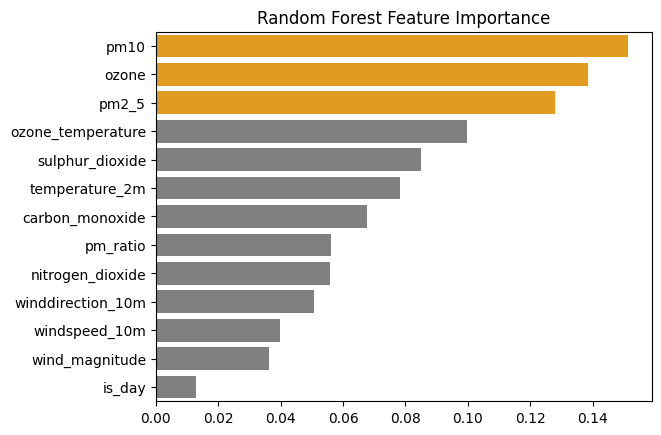

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index = cleaned_data.drop(columns = ['us_aqi']).columns).sort_values(ascending = False)
color = [ 'orange' if column in  ['pm10','ozone','pm2_5'] else 'grey' for column in feature_importance.index ]
sns.barplot(y = feature_importance.index , x = feature_importance, palette = color).set_title('Random Forest Feature Importance')

Based on the bar plot above, the features which have the most impacts the model predictions are pm10, ozone and pm2_5
